In [1]:
from dicom_utils import main
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

In [2]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\Medical-imaging-Research\\Data\\Prostate Cases\\1\\"
output_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmation\\Output\\"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

In [61]:
labels.shape

(186, 512, 512, 25)

Labels has 25 rois which stands for different organs to select

Let's print out the list of rois

In [59]:
contour_table = pd.DataFrame()
number = []
name = []
for i in range(24):
    number.append(contours[i]["number"])
    name.append(contours[i]["name"])
#contour_table["number"] = number
contour_table["name"] = name

In [60]:
contour_table

,name
0,marked iso
1,a prostate
2,b SV
3,PTV
4,d rectum
5,e bladder
6,f Femural Heads
7,g nt avoid
8,fiducials
9,p ring


Find location of the contour where labels == 1 (prostate)

In [64]:
a[a[..., 3] == 1][0]

array([ 63, 246, 245,   1], dtype=int64)

Let's try slice 63 and so on

(-0.5, 511.5, 511.5, -0.5)

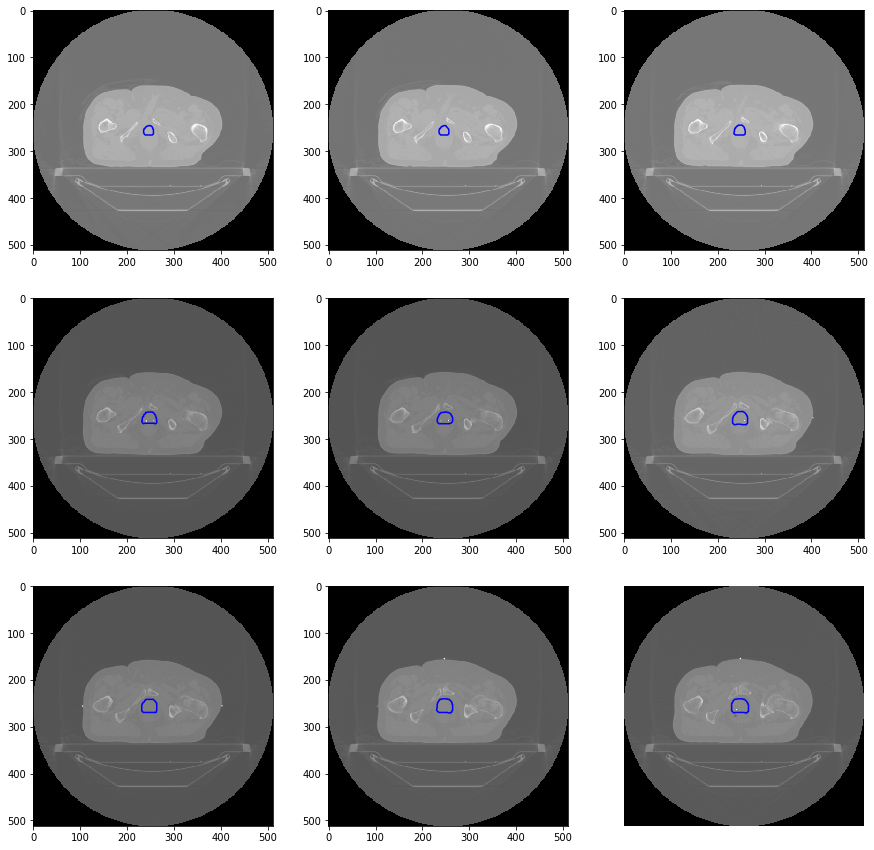

In [56]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 63, ...], cmap="gray")
    plt.contour(labels[..., 1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')